In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Regresión lineal con descenso del gradiente

Dado un conjunto de características $X$ y un conjunto de respuestas $Y$ supondremos que se relacionan de la siguiente forma:

$$Y = W\cdot X + b$$

Lo que queremos hacer es determinar los $W$ que mejor se ajustan a los datos. Para esto propondremos la siguiente función a minimizar (convencionalmente llamada "función coste"):

$$\mathscr{L}(y, a) = \frac1m\sum_{i=1}^m(y_i - a_i)^2$$

con $a_i = W\cdot X_i + b$. 

### Minimización de la función coste

Existen varios métodos para minimizar (incluso este problema tiene una solución analítica) pero aquí utilizaremos descenso del gradiente. Comenzamos en un punto inicial $(W_0, b_0)$ (aleatorio) y calculamos el gradiente de la función en este punto. Con esto podemos actualizar iterativamente:

$$W_0 := W_0 - \alpha \nabla_W \mathscr{L}$$
$$b_0 := b_0 - \alpha \nabla_n \mathscr{L}$$

En nuestro caso particular:

$$\nabla_W \mathscr{L} = -2(y-a)X^T$$
$$\nabla_b \mathscr{L} = -2(y-a)$$

con $a = W\cdot X + b$. 

Este proceso se realiza hasta que haya convergencia hacia un mínimo. En este caso, no checamos convergencia pero lo realizamos 10,000 veces. Como es un problema relativamente sencillo, converge en relativamente pocos pasos.

In [4]:
#Creemos datos unimensionales de prueba

x = np.random.randn(1,20)
#Los parámetros reales de nuestros datos sintéticos
w_true = np.array([2.]).reshape(1,-1)
b_true = np.array([[7.5]])
y = np.dot(w_true.T, x) + b_true
#Les añadimos algo de ruido gaussiano para que no esté tan fácil
y = y+0.15*np.random.randn(1,20)

In [10]:
w,b = grad_desc(np.random.randn(1,1), np.zeros((1,1)),y,x, alpha = 0.1)
t = np.linspace(x.min(), x.max())
y_pred = [w.item()*i + b.item() for i in t]

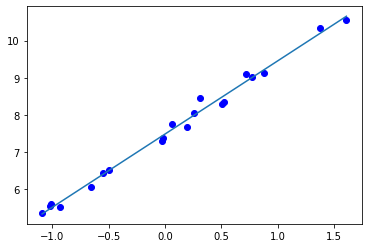

In [11]:
plt.plot(x[0],y[0], 'bo')
plt.plot(t,y_pred)
#Los puntos son nuestros datos sintéticos
#La recta es aquella generada por nuestro algoritmo.
#Como vemos, el algoritmo funciona bastante bien

In [7]:
def cost_function(y, a):
    """
    Regresa el error cuadratico medio entre las observaciones y
    y las predicciones a.
    
    Parametros:
    y -- un vector de etiquetas con forma (n_y, 1)
    a -- un vector de predicciones con forma (n_y, 1)
    """
    difference = (y-a)*(y-a)
    return 1/(y.shape[1])*np.sum(difference, axis = 1).item()

In [8]:
def grad(w, b, y, x):
    """
    Regresa el gradiente de la función costo con respecto a w y b
    
    Parametros:
    w -- la matriz de pesos en la que vamos a evaluar el gradiente de w
    b -- el vector de sesgos en la que vamos a evaluar el gradiente de b
    y -- el vector de etiquetas de los datos de entrenamiento
    x -- la matriz de los datos de entrenamiento
    """
    a = np.dot(w,x) + b
    grad_w = -2/(y.shape[1])*np.dot((y-a),x.T)
    grad_b = -2/(y.shape[1])*np.sum((y-a), axis = 1)
    return grad_w, grad_b

In [9]:
def grad_desc(w_initial, b_initial, y, x, alpha):
    """
    Esta función se encarga de hacer el descenso de gradiente
    con 10000 iteraciones.
    
    Parameters:
    w_initial -- nuestro guess inicial para w
    b_initial -- nuestro guess inicial para b
    y -- los labels de los datos de entrenamiento
    x -- datos de entrenamiento
    alpha -- la constante por la que multiplicaremos el gradiente
    """
    max_iter = 10000
    for i in range(max_iter):
        dw, db = grad(w_initial, b_initial, y, x)
        w_initial = w_initial - alpha*dw
        b_initial = b_initial - alpha*db
    return w_initial, b_initial
        

In [15]:
#Simplemente una breve vreificación de que nuestras
#funciones no tienen problema con datos de más dimensiones
X = np.random.randn(3,10)
W_true = np.array([1., 0.5, 3.75]).reshape([1,-1])
Y = np.dot(W_true, X) + [[5.25]]
Y = Y + 0.25*np.random.randn(1,10)

In [16]:
W_0 = np.random.randn(1,3)
b_0 = np.zeros((1,1))

In [17]:
grad_desc(W_0, b_0, Y, X, alpha = 0.5)

(array([[0.90156659, 0.36825101, 3.75895632]]), array([[5.27506851]]))